# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [64]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [65]:
url= "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [66]:
 apple= pd.read_csv(url)

In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [67]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [68]:
apple.Date = pd.to_datetime(apple.Date)

In [42]:
apple.Date

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [69]:
apple.set_index("Date")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [11]:
x = apple[apple.duplicated("Date")]
if len(x) != 0:
    print("Yes there are duplicates in date column")
else:
    print("No there are no duplicates in date column")

No there are no duplicates in date column


In [12]:
#an other way
apple.duplicated("Date")

0       False
1       False
2       False
3       False
4       False
        ...  
8460    False
8461    False
8462    False
8463    False
8464    False
Length: 8465, dtype: bool

In [23]:
#an other way
apple.index.nunique()

8465

In [70]:
#an other way
apple.index.is_unique()

TypeError: 'bool' object is not callable

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [14]:
# apple= apple.sort_index(axis= " index" , inplace= True)
# apple = apple.sort_values(by="Date",ascending=True).reset_index(drop=True)

In [71]:
apple = apple.sort_values(by="Date",ascending=True)

In [45]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


In [72]:
apple.reset_index(drop=True)

,Date,Open,High,Low,Close,Volume,Adj Close
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
8460,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
8461,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
8462,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
8463,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### Step 9. Get the last business day of each month

In [48]:
#lbd = apple.resample("M").last()
# lbd.shape

In [ ]:
#lbd1= apple.resample("BM").mean()
#lbd1
# len(lbd1.index)

In [56]:
apple["month"] = pd.DatetimeIndex(apple.Date).month
apple["Date_wo"] = pd.DatetimeIndex(apple.Date).day
apple.groupby(by="month")[["Date_wo"]].max().reset_index()

,month,Date_wo
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


### Step 10.  What is the difference in days between the first day and the oldest

In [57]:
differnce = apple.Date.max() - apple.Date.min() 
str(differnce)

'12261 days 00:00:00'

In [58]:
# another way
apple.index[0]- apple.index[-1] 

8464

In [76]:
# another way
#(apple.index.max() - apple.index.min()).days

### Step 11.  How many months in the data we have?

In [59]:
months_data = apple["month"].count()
months_data

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

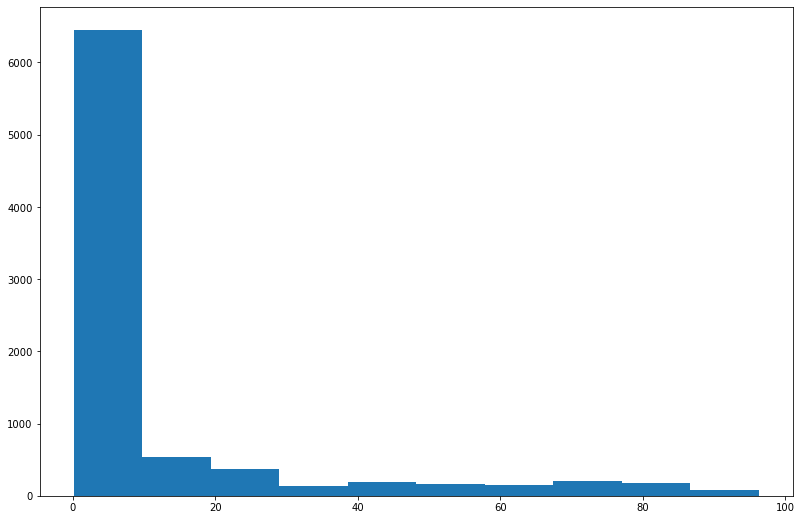

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()

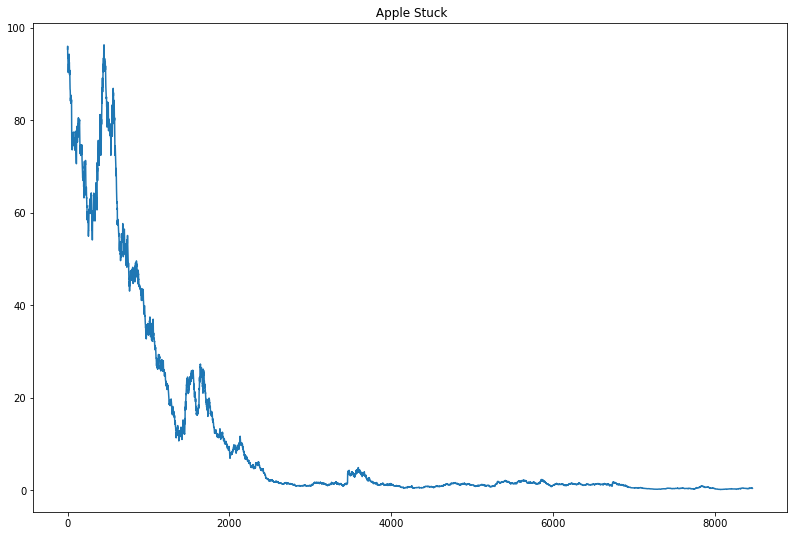

In [77]:
# another way

#makes the plot and assign it to a variable 
apple_open= apple["Adj Close"].plot(title = " Apple Stuck")
#change the size of the graph
fig = apple_open. get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.